## Import necessary libraries 

In [12]:
!pip install opendatasets

In [13]:
import cv2
import matplotlib.pyplot as plt

In [14]:
import opendatasets as od
import pandas as pd

#od.download('https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset/data')

# Load the dataset from CSV file

In [16]:
df = pd.read_csv('archive/english.csv')
df

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


# Read an image and display it

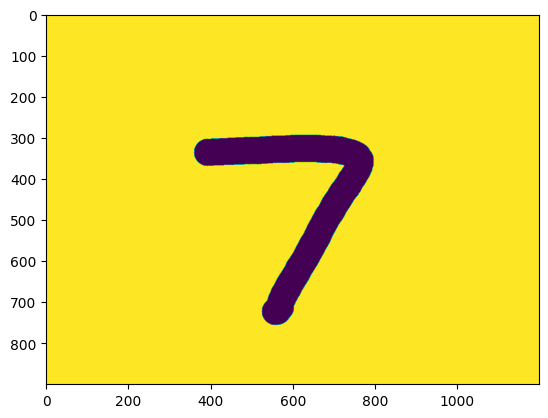

In [18]:
img = cv2.imread('archive/Img/img008-025.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

# Resize the image and display it again

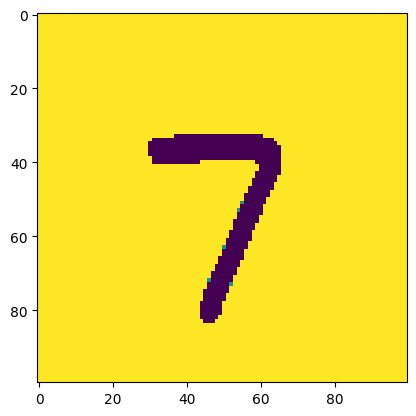

In [19]:
img = cv2.resize(img,(100,100))
plt.imshow(img)

In [20]:
img.shape

(100, 100)

# Add the image path to the dataset

In [21]:
df['image'] = 'archive/' + df['image']

# Preprocess the labels

In [22]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['label']= label_encoder.fit_transform(df['label'])


In [23]:
df

,image,label
0,archive/Img/img001-001.png,0
1,archive/Img/img001-002.png,0
2,archive/Img/img001-003.png,0
3,archive/Img/img001-004.png,0
4,archive/Img/img001-005.png,0
...,...,...
3405,archive/Img/img062-051.png,61
3406,archive/Img/img062-052.png,61
3407,archive/Img/img062-053.png,61
3408,archive/Img/img062-054.png,61


# Load the images and labels into lists

In [24]:
images = []
labels = []

def imageLoad(row):
  path = row['image']
  img = cv2.imread(path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(100,100))
  images.append(img)
  labels.append(row['label'])


In [25]:
df.apply(imageLoad,axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
3405    None
3406    None
3407    None
3408    None
3409    None
Length: 3410, dtype: object

# Split the dataset into training and testing sets

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images,labels , random_state=102,  test_size=0.20,  shuffle=True)

# Convert the datasets to tensors

In [27]:
import tensorflow as tf

X_train = tf.convert_to_tensor(X_train)

X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)




# Normalize the pixel values

In [ ]:

X_train = X_train/255
X_test = X_test/255

# Define the neural network model

In [29]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [30]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(100,100,1)))
model.add(layers.Dense(728,activation='relu'))
model.add(layers.Dense(500,activation='relu'))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(60,activation='relu'))
model.add(layers.Dense(62,activation='softmax'))


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 728)               7280728   
                                                                 
 dense_1 (Dense)             (None, 500)               364500    
                                                                 
 dense_2 (Dense)             (None, 200)               100200    
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 60)                6060      
                                                                 
 dense_5 (Dense)             (None, 62)                3

# Compile the model

In [32]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model

In [33]:
history = model.fit(X_train, y_train, epochs=150,
                    validation_data=(X_test, y_test))

Epoch 1/150
86/86 [==============================] - 4s 33ms/step - loss: 4.1398 - accuracy: 0.0202 - val_loss: 4.1282 - val_accuracy: 0.0220
Epoch 2/150
86/86 [==============================] - 3s 30ms/step - loss: 4.1293 - accuracy: 0.0224 - val_loss: 4.1335 - val_accuracy: 0.0235
Epoch 3/150
86/86 [==============================] - 2s 28ms/step - loss: 4.1276 - accuracy: 0.0169 - val_loss: 4.1257 - val_accuracy: 0.0161
Epoch 4/150
86/86 [==============================] - 3s 29ms/step - loss: 4.1197 - accuracy: 0.0231 - val_loss: 4.1176 - val_accuracy: 0.0220
Epoch 5/150
86/86 [==============================] - 3s 29ms/step - loss: 4.1160 - accuracy: 0.0257 - val_loss: 4.1179 - val_accuracy: 0.0220
Epoch 6/150
86/86 [==============================] - 3s 29ms/step - loss: 4.1096 - accuracy: 0.0224 - val_loss: 4.1000 - val_accuracy: 0.0103
Epoch 7/150
86/86 [==============================] - 3s 29ms/step - loss: 4.0989 - accuracy: 0.0275 - val_loss: 4.0961 - val_accuracy: 0.0205
Epoch 

# Plot the accuracy and loss of the model

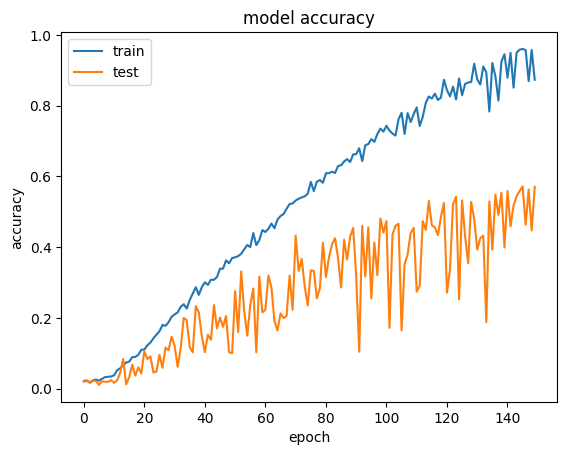

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [48]:
print("Accuracy at 150 epochs: {:.2f}%".format(history.history['val_accuracy'][-1]*100))

Accuracy at 150 epochs: 57.04%


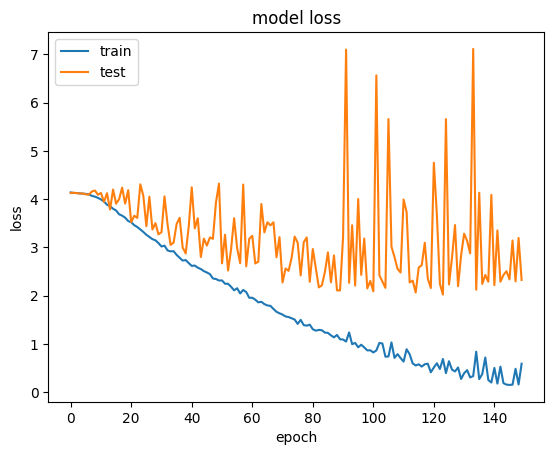

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [39]:
print("Loss at 150 epochs: {:.2f}".format(history.history['loss'][-1]))

Loss at 150 epochs: 0.59
